## Name: Ujwala Gour

## #Task 2 : Prediction using Unsupervised ML (K- Means Clustering)

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
## Load the iris dataset
data = pd.read_csv('D:\Iris data.csv',header =0)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Dropping unwanted column
data.drop('Id',axis=1,inplace=True)
data.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## Analysing The Dataset:
print('Dimension of dataset:{}'.format(data.shape))
print('Number of duplicated values:{}'.format(data.duplicated().sum()))
print('Schema of the dataset:\n',data.info())
print('Descriptive Analysis:\n{}'.format(data.describe()))
print('Correlation:\n{}'.format(data.corr()))

Dimension of dataset:(150, 5)
Number of duplicated values:3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Schema of the dataset:
 None
Descriptive Analysis:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       

In [6]:
print('Count of Species:\n{}'.format(data['Species'].value_counts()))

Count of Species:
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


In [7]:
## Finding the optimum number of clusters for k-means classification

df = data.iloc[:, [0, 1, 2, 3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', 
                    max_iter = 300, n_init=10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


## Using elbow graph to find optimum number of cluster:

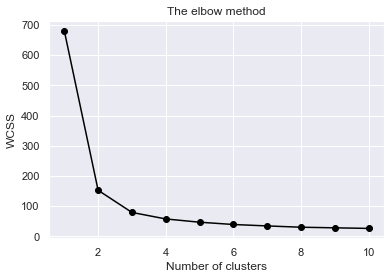

In [8]:
## Plotting the results onto a line graph, 

import seaborn as sns

sns.set(style ="darkgrid") 
plt.plot(range(1, 11), wcss,marker ='o', color ='black')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3. From this we choose the number of clusters k as 3.

In [9]:
## Applying kmeans to the dataset:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualising the clusters:

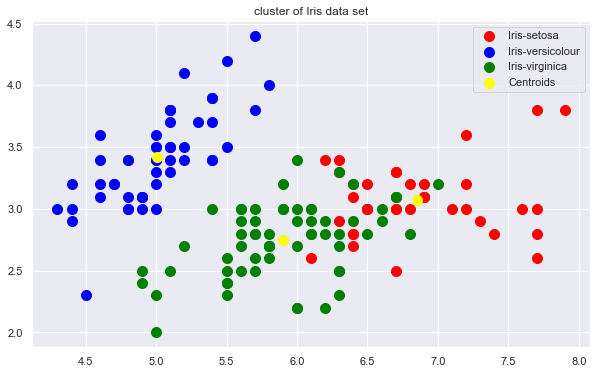

In [10]:

fig=plt.figure(figsize=(10,6))

plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters

plt.title('cluster of Iris data set')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()